In [50]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [8]:
T0 = [0,2,4,5,3,1]
edges = [(0,1),(0,2),(1,2),(1,3),(2,4),(2,5)]

In [7]:
G = nx.Graph()
G.add_nodes_from(T0)
G.add_edges_from(edges)

In [39]:
def Distance(graph, T):
    distance = {}
    for node in graph.nodes():
        neighbors = list(graph.neighbors(node))
        neighbors.append(node)
        nb = len(neighbors)
        dist = 1/nb* sum(T.index(neighbor) for neighbor in neighbors)
        distance[node] = dist
    return distance
    
def sortDistance(graph, T):
    distance = Distance(graph, T)
    Sorted = sorted(distance,key=distance.get)
    return Sorted

In [45]:
print("T0 = ", T0,Distance(G,T0))
T1 = sortDistance(G, T0)
print("T1 = ",T1,Distance(G,T1))
T2 = sortDistance(G, T1)
print("T2 = ",T2,Distance(G,T2))
T3 = sortDistance(G, T2)
print("T3 = ",T3,Distance(G,T3))


T0 =  [0, 2, 4, 5, 3, 1] {0: 2.0, 2: 2.2, 4: 1.5, 5: 2.0, 3: 4.5, 1: 2.5}
T1 =  [4, 0, 5, 2, 1, 3] {0: 2.6666666666666665, 2: 2.0, 4: 1.5, 5: 2.5, 3: 4.5, 1: 3.25}
T2 =  [4, 2, 5, 0, 1, 3] {0: 2.6666666666666665, 2: 2.0, 4: 0.5, 5: 1.5, 3: 4.5, 1: 3.25}
T3 =  [4, 5, 2, 0, 1, 3] {0: 3.0, 2: 2.0, 4: 1.0, 5: 1.5, 3: 4.5, 1: 3.5}


In [47]:
def arc_diagram_algorithm(graph, initial_layout, max_iterations=100, convergence_threshold=0.001):
    layout = initial_layout.copy()
    for i in range(max_iterations):
        new_layout = sortDistance(graph, layout)
        distances = Distance(graph, new_layout)
        layout = new_layout
        # Ajoutez ici votre critère de convergence
        # (par exemple, en vérifiant si les distances ont convergé)
        if max(distances.values()) - min(distances.values()) < convergence_threshold:
            break
    return layout

In [48]:
Tf = arc_diagram_algorithm(G, T0)

print("Résultat final du diagramme en arcs:", Tf)

Résultat final du diagramme en arcs: [4, 5, 2, 0, 1, 3]


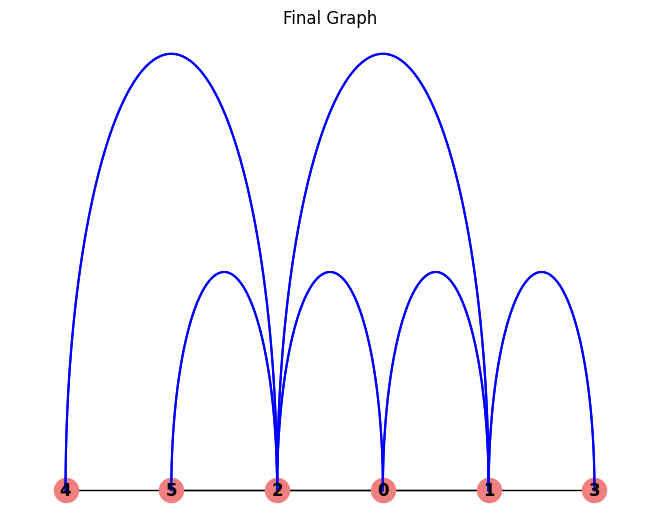

In [53]:
def draw_final_graph_with_curved_edges(graph, final_layout):
    pos = {node: (final_layout.index(node), 0) for node in final_layout}
    
    # Draw the graph with the final layout
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='lightcoral', font_color='black')

    # Draw arcs between each node and its neighbors
    for node in final_layout:
        neighbors = list(graph.neighbors(node))
        for neighbor in neighbors:
            pos_edge1 = np.array([pos[node][0], pos[node][1]])
            pos_edge2 = np.array([pos[neighbor][0], pos[neighbor][1]])
            
            # Calculate the center and radius
            center = ((pos_edge2[0] + pos_edge1[0]) / 2, 0)
            radius = np.abs((pos_edge2[0] - pos_edge1[0]) / 2)
            
            # Create an array of angles
            theta = np.linspace(0, np.pi, 100)
        
            x = center[0] + radius * np.cos(theta)
            y = center[1] + radius * np.sin(theta)
            
            # Plot the arc
            plt.plot(x, y, color='blue')

    plt.title('Final Graph')
    plt.show()

# Example usage:
draw_final_graph_with_curved_edges(G, Tf)